# Statistical Analysis of the Traffic Datasets

I began by loading the previously cleaned and consolidated dataset "traffic_clean.csv" as the dataframe **traffic_clean**, and briefly reviewing its statistical characteristics via describe().    

## Initial Analysis

Aside from a few variables, very little useful information could be obtained by this method, as nearly all of the variables are categorical variables, each item of numerical data actually standing as a key for a particular qualitative piece of information.  For example, under the variable MDRDSTRD (indicating whether the driver was distracted), the number 3 indicates that the driver was distracted by a fellow vehicle occupant.  These detailed translations of numerical keys to qualitative data are given in the **Fatality Analysis Reporting System (FARS) Analytical User’s Manual** for 1975-2015 published by the National Highway Traffic Safety Administration (NHTSA). I have included relevant excerpts from this manual in the displays under the histograms below.  

Here, I chose to interpret the ordinal variables of MONTH, DAY_WEEK and HOUR as numerical variables since the numerical distance between each of these categories is equal (1 month, 1 weekday, 1 hour). (*See*, [here](https://www.theanalysisfactor.com/pros-and-cons-of-treating-ordinal-variables-as-nominal-or-continuous/), regarding the statistical interpretation of ordinal variables.) It appears that the mean and median month in which fatal accidents occur is July.  This is also the most frequently occurring month.  The mean MONTH is 6.773911 and the median is 7. The mean and median day of the week on which fatal accidents occur appears to be Wednesday.  The mean DAY_WEEK is 4.124882 and the median is 4, and since the first day of the week is Sunday as this variable is defined, 4 translates to Wednesday.  However, the most commonly occurring day of the week is 7, Saturday. This makes sense, as one might imagine that greater numbers of people may be out drinking heavily on a day like Saturday, and such drinking may contribute to causing fatal accidents. The mean and median HOUR is somewhere between 1pm and 2pm (13.03 and 14, respectively, even after removing the 99 (unknown) label value from the calculation). However, the most frequently occurring hour is 17, or 5pm, the beginning of rush hour. Finally, the most common area type for fatal accidents to occur was in rural areas (RUR_URB = 1).  

## Fatal Accident Analysis

I then ran counts for the numbers of fatalities per accident.  The most common number of deaths in fatal accidents in 2015 was 1 at 69,811.  I also ran counts for the numbers of what I defined as "serious fatalities" using the new SERIOUS_FATALS variable created during the data cleaning process. I defined these "serious fatalties" as accidents in which the number of fatalties was greater than 1.  The total number of serious fatalities was 9,808 with the most common number of deaths per accident being 2.  12.32% of the fatal accidents in 2015 were  serious fatalities.  

## Human vs. Environmental Causes of Serious Fatalities

In an effort to determine the share of human-related causes compared to environmental causes of serious fatalities, I chose to examine several human-related and environment-related variables.  The variables relating to human causes were DRUNK_DR (the number of drunk drivers in a fatal accident), DRUGS (whether or not drug use was involved in the accident), TRAV_SP (the travel speed of the vehicle, filtered for where the vehicle's speed was greater than the posted speed limit (TRAV_SP > VSPD_LIM)), MDRDSTRD (characterizing any distractions that may have led to the accident), and MVIOLATN (any violations of motor vehicle law that were charged in relation to the accident). The variables relating to environmental causes were WEATHER (weather conditions at the time of the accident), VSURCOND (the road condition at the time of the accident) and LGT_COND (the lighting conditions at the time of the accident).  

### Human Factors

The total number of drunk drivers involved in serious fatalities was 3,136. Drunk drivers were involved in 31.97% of serious fatalities.  There was usually only 1 drunk driver involved.  Occasionally there were 2 (243 accidents), but never more than 3 drunk drivers involved (7 accidents).  

The total number of drug users involved in serious fatalities was 450.  Drug users were involved in 13.23% of serious fatalities.  

As can be observed from the histogram, the majority of the posted speed limits were highway speeds (approximately 60 m.p.h.) and most of the travel speeds were contained within this limit.  The number of accidents involving excess speed (over the posted limit) was 1,360 and accounted for 13.87% of serious fatalities. The average excess speed was  71 m.p.h.  The average amount by which the speed was in excess of the posted limit was  21 m.p.h.

The total number of accidents involving distracted drivers was 690 and accounted for 7.04% of serious fatalities. The most common distraction appeared to be general inattention, but the most common specific types of distractions were those resulting from other vehicle occupants (73/690 = 10.58% of distracted drivers) and from cell phone-related distractions (37/690 = 5.36% of distracted drivers).  

The total number of accidents in which drivers were charged with violations of motor vehcile law was 993 and accounted for just 10.12% of serious fatalities.  However, in order to avoid double counting of impairment-related and speed-related causes already discussed, I excluded these types of offenses and ran another count for other types of violations. The total number of accidents in which drivers were charged with non-impairment-related and non-speed-related violations of motor vehcile law was 676 and accounted for 6.89% of serious fatalities. The most common violation charged appeared to be Manslaughter or Homicide. Ironically, there did not appear to be many instances where charges were filed in accidents involving serious fatalities in 2015.  No charges were filed in 8,443 cases. Perhaps by filing charges where appropriate more frequently, it could serve as a deterrent to driver behaviors that lead to serious fatalities in the future. 

### Environmental Factors

The total number of accidents in which adverse weather conditions were involved was 2,759 and accounted for 28.13% of serious fatalities, where the most common type of adverse weather was cloudiness.  However, in most accidents involving serious fatalities the weather was clear (in 6,974 instances), which initially suggests that more often than not human agency (or lack thereof) is to blame for the accident.  

The total number of accidents in which adverse road conditions were involved was 1,653 and accounted for 16.85% of serious fatalities, where the most common type of adverse road condition was wetness. However, just as with weather conditions discussed above, the majority of serious fatalities (8,027 instances) involved dry road conditions. This again suggests that human agency may be more at fault than environmental factors in causing serious fatalities.  

The total number of accidents in which adverse lighting conditions were involved was 3,235 and accounted for 32.98% of serious fatalities, where the most common type of adverse lighting condition was darkness with no or inadequate lighting.  Again, however, there were daylight conditions in most serious fatalities (5,234 instances).  

## Conclusions and Summary

In order to truly get a sense of the degree to which human-related causes or environmental causes were more at fault in serious fatalities, I filtered the SERIOUS_FATALS variable for human-related factors with affirmative (causative) conditions, as done for the analyses of these variables given above, and environmental variables with favorable conditions (clear skies, dry roads, daylight or well-lit conditions). I used the foregoing filtering followed by a count to create a new variable called **human_not_env**. I then performed the same filtering, but without specifying conditions for the environmental variable, to create a second variable called **mixed_causes**.  I then obtained the proportion of solely human-caused accidents by dividing **human_not_env** by the total number of SERIOUS_FATALS. To obtain the proportion of causes solely due to environmental factors, I subtracted **mixed_causes** from the total_number of SERIOUS_FATALS and divided by the total_number of SERIOUS_FATALS. Finally, to obtain the proportion of causes due a combination of human and environmental causes, I subtracted **human_not_env** from **mixed_causes** (since the exclusive case was subsumed within this variable) to get the number of mixed causes and divided by the total_number of SERIOUS_FATALS. The results were as follows:

Proportion of Solely Human-Caused Serious Fatalities: 35.59 % 

Proportion of Solely Environment-Related Serious Fatalities: 20.58 %

Proportion of Combined Human and Environment-Caused Serious Fatalities: 43.83 %

Thus, it appears that in the majority of cases there is a shared combination of human and environment-related causes acting simultaneously to bring about serious fatalities, but where only one or the other factor is solely present, human-related factors are more often than not to blame. These ideas will be further put to the test in my Machine Learning Analysis report.  

In [1]:
import numpy as np
import pandas as pd

#Read cleaned csv to new dataframe
traffic_clean = pd.read_csv("traffic_clean.csv")
traffic_clean.head()

,ST_CASE,MONTH,YEAR,DAY_WEEK,HOUR,RUR_URB,ROUTE,RELJCT1,RELJCT2,WRK_ZONE,...,BIN_SPEEDREL,BIN_REST_USE,BIN_DRUGS,BIN_P_SF1,BIN_MDRDSTRD,BIN_DRIMPAIR,BIN_MFACTOR,BIN_MDRMANAV,BIN_MVISOBSC,SERIOUS_FATALS
0,10001,1,2015,5,2,1,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,10002,1,2015,5,22,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,10003,1,2015,5,1,1,2,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,10003,1,2015,5,1,1,2,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,10004,1,2015,1,0,1,3,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [2]:
#Get overall statistical description
traffic_clean.describe()

,ST_CASE,MONTH,YEAR,DAY_WEEK,HOUR,RUR_URB,ROUTE,RELJCT1,RELJCT2,WRK_ZONE,...,BIN_SPEEDREL,BIN_REST_USE,BIN_DRUGS,BIN_P_SF1,BIN_MDRDSTRD,BIN_DRIMPAIR,BIN_MFACTOR,BIN_MDRMANAV,BIN_MVISOBSC,SERIOUS_FATALS
count,79619.000000,79619.000000,79619.0,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,...,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000
mean,278837.884801,6.773911,2015.0,4.124882,13.410379,1.936523,3.594506,0.051746,2.256283,0.039086,...,0.200442,0.642422,0.048720,0.002901,0.085683,0.186915,0.031224,0.097841,0.032103,0.123187
std,162125.918213,3.334996,0.0,2.115920,8.730511,1.716789,2.056005,0.258368,4.590703,0.305574,...,0.400334,0.479290,0.215282,0.053786,0.279897,0.389846,0.173923,0.297101,0.176274,0.328653
min,10001.000000,1.000000,2015.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,122391.000000,4.000000,2015.0,2.000000,8.000000,1.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,280220.000000,7.000000,2015.0,4.000000,14.000000,2.000000,3.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,420715.000000,10.000000,2015.0,6.000000,19.000000,2.000000,5.000000,0.000000,2.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,560130.000000,12.000000,2015.0,7.000000,99.000000,9.000000,9.000000,9.000000,99.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
#Get counts of most frequent month, day of the week and time that fatal accidents occur

print("Most frequent month: {}".format(traffic_clean['MONTH'].value_counts().index[0]), "= July")
print("Most frequent day of the week: {}".format(traffic_clean['DAY_WEEK'].value_counts().index[0]), "= Saturday")
print("Most frequent time of day: {}".format(traffic_clean['HOUR'].value_counts().index[0]), "= 5pm")

#Get revised mean and median hour, removing 99 (unknown) label from calculation
print("Revised Mean Hour: {}".format(traffic_clean[traffic_clean['HOUR'] != 99]['HOUR'].mean()))
print("Revised Median Hour: {}".format(traffic_clean[traffic_clean['HOUR'] != 99]['HOUR'].quantile()))

#Get most frequent type of area where fatal accidents occur
print("Most frequent area type: {}".format(traffic_clean['RUR_URB'].value_counts().index[0]), "= Rural")


Most frequent month: 7 = July
Most frequent day of the week: 7 = Saturday
Most frequent time of day: 17 = 5pm
Revised Mean Hour: 13.03464066304197
Revised Median Hour: 14.0
Most frequent area type: 1 = Rural


It appears that the mean and median month in which fatal accidents occur is July.  This is also the most frequently occurring month.  The mean MONTH is 6.773911 and the median is 7. The mean and median day of the week on which fatal accidents occur appears to be Wednesday.  The mean DAY_WEEK is 4.124882 and the median is 4, and since the first day of the week is Sunday as this variable is defined, 4 translates to Wednesday.  However, the most commonly occurring day of the week is 7, Saturday. This makes sense, as one might imagine that greater numbers of people may be out drinking heavily on a day like Saturday, and such drinking may contribute to causing fatal accidents. The mean and median HOUR is somewhere between 1pm and 2pm (13.03 and 14, respectively, even after removing the 99 (unknown) label value from the calculation). However, the most frequently occurring hour is 17, or 5pm, the beginning of rush hour. Finally, the most common area type for fatal accidents to occur was in rural areas (RUR_URB = 1).  

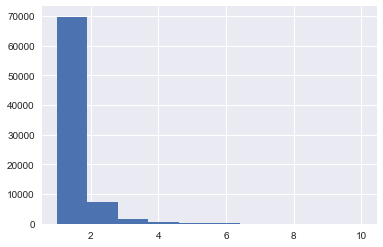

1     69811
2      7379
3      1539
4       478
5       264
6       115
8        18
10       15
Name: FATALS, dtype: int64
Total Serious Fatalities:  9808
Proportion of Serious Fatalities: 12.32 %


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#Histogram of number of fatalities in each accident
fig, ax = plt.subplots()
ax.hist(traffic_clean['FATALS'])
plt.show()

#Counts of fatalities in accidents
print(traffic_clean['FATALS'].value_counts())

#Get total and proportion of serious fatalities (greater than 1 fatality)
total_serious = np.sum(traffic_clean['SERIOUS_FATALS'])
total_fatal = len(traffic_clean['FATALS'])

print("Total Serious Fatalities: ", total_serious)
print("Proportion of Serious Fatalities: {0:.2f}".format((total_serious/total_fatal) * 100),"%")

I then ran counts for the numbers of fatalities per accident.  The most common number of deaths in fatal accidents in 2015 was 1 at 69,811.  I also ran counts for the numbers of what I defined as "serious fatalities" using the new SERIOUS_FATALS variable created during the data cleaning process. I defined these "serious fatalties" as accidents in which the number of fatalties was greater than 1.  The total number of serious fatalities was 9,808 with the most common number of deaths per accident being 2.  12.32% of the fatal accidents in 2015 were  serious fatalities.  

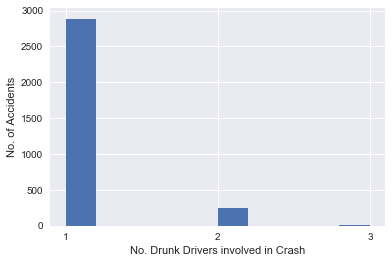

0    6672
1    2886
2     243
3       7
Name: DRUNK_DR, dtype: int64
Total Drunk Drivers Involved:  3136
Proportion of Serious Fatalities Involving Drunk Drivers: 31.97 %


In [59]:
#Histogram of drunk drivers involved in accidents with serious fatalities

drunk_drivers = traffic_clean[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['DRUNK_DR'] > 0)]['DRUNK_DR']
drunk_all = traffic_clean[traffic_clean['SERIOUS_FATALS'] > 0]['DRUNK_DR']

fig, ax = plt.subplots()
ax.hist(drunk_drivers, bins=10)
ax.set_xlabel("No. Drunk Drivers involved in Crash")
ax.set_xticks([1, 2, 3])
ax.set_ylabel("No. of Accidents")
plt.show()

#Get counts and propotions of serious fatalities involving drunk driving
print(drunk_all.value_counts())

total_drunk_all = len(drunk_all)
total_drunk = len(drunk_drivers)
print("Total Drunk Drivers Involved: ", total_drunk)
print("Proportion of Serious Fatalities Involving Drunk Drivers: {0:.2f}".format((total_drunk/total_drunk_all) * 100),"%")


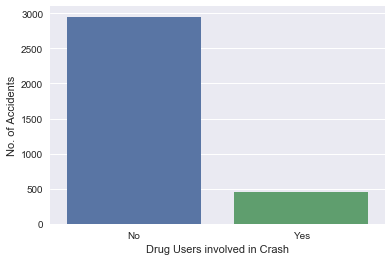

0    2952
1     450
Name: DRUGS, dtype: int64
Total Drug Users Involved:  450
Proportion of Serious Fatalities Involving Drug Users: 13.23 %


In [6]:
#Histogram of drug use in accidents with serious fatalities
#Excludes unknown and unreported instances
drugs = traffic_clean[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['DRUGS'] != 8) & (traffic_clean['DRUGS'] != 9)]['DRUGS']

fig, ax = plt.subplots()
sns.countplot(x=drugs)
ax.set_xlabel("Drug Users involved in Crash")
ax.set_xticklabels(["No", "Yes"])
ax.set_ylabel("No. of Accidents")
plt.show()

#Get counts and proportions of serious fatalities involving drugs

print(drugs.value_counts())

total_drugs_all = len(drugs)
total_drugs = len(drugs[traffic_clean['DRUGS'] == 1])
print("Total Drug Users Involved: ", total_drugs)
print("Proportion of Serious Fatalities Involving Drug Users: {0:.2f}".format((total_drugs/total_drugs_all) * 100),"%")


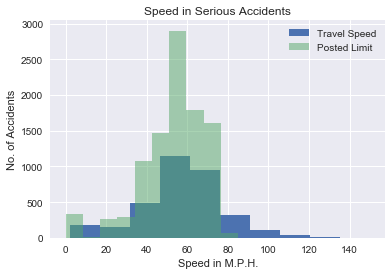

Number of Excess Speed cases:  1360
Percent of Serious Fatalities involving Excess Speed: 13.87 %
The average excess speed was  71 m.p.h.
The average amount by which the speed was in excess of the posted limit was  21 m.p.h.


In [7]:
#Histogram of speed and posted speed limits juxtaposed in accidents with serious fatalities

fig, ax = plt.subplots()
ax.hist(traffic_clean[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['TRAV_SP'] > 0)]['TRAV_SP'], label="Travel Speed")
ax.hist(traffic_clean[traffic_clean['SERIOUS_FATALS'] > 0]['VSPD_LIM'], alpha=0.5, label="Posted Limit")
ax.set_xlabel("Speed in M.P.H.")
ax.set_ylabel("No. of Accidents")
ax.legend()
ax.set_title("Speed in Serious Accidents")
plt.show()

#Get counts and proportions of serious fatalities speeds exceeding posted speed limits
excess_speed = traffic_clean[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['TRAV_SP'] > traffic_clean['VSPD_LIM'])]['TRAV_SP']
percent_excess_speed = (len(excess_speed)/total_serious) * 100
posted_limit = traffic_clean[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['TRAV_SP'] > traffic_clean['VSPD_LIM'])]['VSPD_LIM']
diff_speed = excess_speed.subtract(posted_limit, fill_value=0) 
print("Number of Excess Speed cases: ", len(excess_speed))
print("Percent of Serious Fatalities involving Excess Speed: {0:.2f}".format(percent_excess_speed), "%")
print("The average excess speed was ", int(np.round(excess_speed.mean())), "m.p.h.")
print("The average amount by which the speed was in excess of the posted limit was ", int(np.round(diff_speed.mean())), "m.p.h.")


As can be observed from the histogram, the majority of the posted speed limits were highway speeds (approximately 60 m.p.h.) and most of the travel speeds were contained within this limit.  The number of accidents involving excess speed (over the posted limit) was 1,360 and accounted for 13.87% of serious fatalities. The average excess speed was  71 m.p.h.  The average amount by which the speed was in excess of the posted limit was  21 m.p.h.

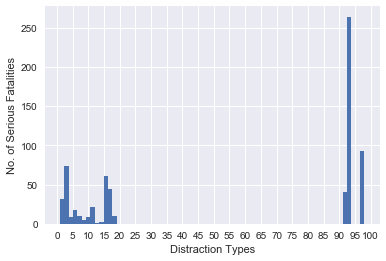

0     6629
93     264
98      93
3       73
17      44
92      40
15      37
1       31
Name: MDRDSTRD, dtype: int64
Legend: 

0 : Not Distracted
93 : Inattention (Inattentive), Details Unknown
98 : Other Distraction
3 : By Other Occupant(s)
17 : Distraction/Inattention
92 : Distraction (Distracted), Details Unknown
15 : Other Cellular Phone Related
1 : Looked But Did Not See


Total Distracted Drivers Involved:  690
Most common distraction:  93 , Inattention
Proportion of Serious Fatalities Involving Distracted Drivers: 7.04 %


In [55]:
#Histogram of driver distraction in accidents with serious fatalities
#Excludes unknown and unreported instances

distracted = traffic_clean.loc[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['MDRDSTRD'] != 0) & (traffic_clean['MDRDSTRD'] != 99) & (traffic_clean['MDRDSTRD'] != 96), 'MDRDSTRD']
distracted_all = traffic_clean.loc[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['MDRDSTRD'] != 99) & (traffic_clean['MDRDSTRD'] != 96), 'MDRDSTRD']

fig, ax = plt.subplots()
ax.hist(distracted, bins=70)

ax.set_xlabel("Distraction Types")
ax.set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
ax.set_ylabel("No. of Serious Fatalities")

#plt.legend([93, 98, 3, 17, 92, 15, 1, 16, 12, 6, 7, 19, 5, 10, 9, 14, 13], ["Inattention (Inattentive)"])
plt.show()

#Legend Print Function
def legend_print(dictionary):
    print("Legend: \n")
    for keys, values in dictionary.items():
        print(keys, ":", values)
    print("\n")    
    return

#Legend Dictionary
distr_dict = {0: "Not Distracted", 
             93: "Inattention (Inattentive), Details Unknown", 
             98: "Other Distraction", 
             3: "By Other Occupant(s)", 
             17: "Distraction/Inattention", 
             92: "Distraction (Distracted), Details Unknown",
             15: "Other Cellular Phone Related",
             1: "Looked But Did Not See"}

#Get counts and proportions of serious fatalities involving driver distraction

total_distracted = len(distracted)
total_distracted_all = len(distracted_all)
print(distracted_all.value_counts().head(8))
legend_print(distr_dict)
print("Total Distracted Drivers Involved: ", total_distracted)
print("Most common distraction: ", distracted.value_counts().index[0], ", Inattention")
print("Proportion of Serious Fatalities Involving Distracted Drivers: {0:.2f}".format((total_distracted/total_serious) * 100),"%")


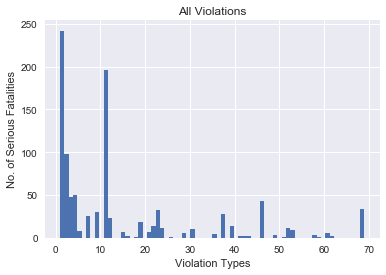

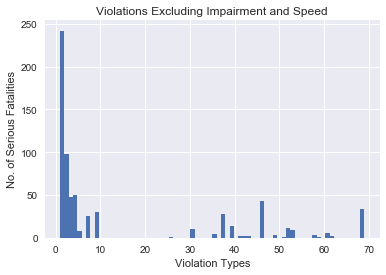

0     8443
1      242
11     196
2       98
72      50
Name: MVIOLATN, dtype: int64
1     242
2      98
4      50
3      48
46     43
dtype: int64
Legend: 

0 : None
1 : Manslaughter or Homicide
11 : Driving While Intoxicated (Alcohol or Drugs) or BAC above Limit
2 : Willful Reckless Driving; Driving to Endanger; Negligent Driving
72 : Other Driver License Violations
4 : Inattentive, Careless, Improper Driving
3 : Unsafe Reckless (Not Willful, Wanton Reckless) Driving
46 : Fail to Yield Generally


Total Violations of Motor Vehicle Law Involved:  993
Total Non-Impairment or Speed-Related Violations of Motor Vehicle Law Involved:  676
Most common violation:  1 , Manslaughter or Homicide
Proportion of Serious Fatalities Involving Violations of Motor Vehicle Law: 10.12 %
Proportion of Serious Fatalities Involving Non-Impairment or Speed-Related Violations: 6.89 %


In [60]:
#Histogram of violations of motor vehicle law in accidents with serious fatalities
#Excludes unknown and unreported instances

m_viol = traffic_clean.loc[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['MVIOLATN'] > 0) & (traffic_clean['MVIOLATN'] < 71), 'MVIOLATN']
m_viol_all = traffic_clean.loc[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['MVIOLATN'] != 99) & (traffic_clean['MVIOLATN'] != 97), 'MVIOLATN']

fig, ax = plt.subplots()

ax.hist(m_viol, bins=70)
ax.set_xlabel("Violation Types")
ax.set_ylabel("No. of Serious Fatalities")
ax.set_title("All Violations")
plt.show()


#Get counts and proportions of serious fatalities involving violations of motor vehicle law
#Totals and proportions for all violations and violations excluding impairment and speed-related offenses (to avoid overlap with preceding variables)
total_m_viol = len(m_viol)
total_m_viol_all = len(m_viol_all)
impair_viol = [11, 12, 13, 14, 15, 16, 18, 19]
speed_viol = [21, 22, 23, 24, 25, 29]
other_viol = pd.Series([elem for elem in m_viol.values if elem not in impair_viol and elem not in speed_viol])
total_other_viol = len(other_viol)

fig2, ax2 = plt.subplots()
ax2.hist(other_viol, bins=70)
ax2.set_xlabel("Violation Types")
ax2.set_ylabel("No. of Serious Fatalities")
ax2.set_title("Violations Excluding Impairment and Speed")
plt.show()

#Legend Dictionary
viol_dict = {0: "None",
            1: "Manslaughter or Homicide",
            11: "Driving While Intoxicated (Alcohol or Drugs) or BAC above Limit",
            2: "Willful Reckless Driving; Driving to Endanger; Negligent Driving",
            72: "Other Driver License Violations",
            4: "Inattentive, Careless, Improper Driving",
            3: "Unsafe Reckless (Not Willful, Wanton Reckless) Driving",
            46: "Fail to Yield Generally"}

print(m_viol_all.value_counts().head())
print(other_viol.value_counts().head())
legend_print(viol_dict)
print("Total Violations of Motor Vehicle Law Involved: ", total_m_viol)
print("Total Non-Impairment or Speed-Related Violations of Motor Vehicle Law Involved: ", total_other_viol)
print("Most common violation: ", m_viol.value_counts().index[0], ", Manslaughter or Homicide")
print("Proportion of Serious Fatalities Involving Violations of Motor Vehicle Law: {0:.2f}".format((total_m_viol/total_serious) * 100),"%")
print("Proportion of Serious Fatalities Involving Non-Impairment or Speed-Related Violations: {0:.2f}".format((total_other_viol/total_serious) * 100),"%")


The total number of accidents in which drivers were charged with violations of motor vehcile law was 993 and accounted for just 10.12% of serious fatalities.  However, in order to avoid double counting of impairment-related and speed-related causes already discussed, I excluded these types of offenses and ran another count for other types of violations. The total number of accidents in which drivers were charged with non-impairment-related and non-speed-related violations of motor vehcile law was 676 and accounted for 6.89% of serious fatalities. The most common violation charged appeared to be Manslaughter or Homicide. Ironically, there did not appear to be many instances where charges were filed in accidents involving serious fatalities in 2015.  No charges were filed in 8,443 cases. Perhaps by filing charges where appropriate more frequently, it could serve as a deterrent to driver behaviors that lead to serious fatalities in the future. 

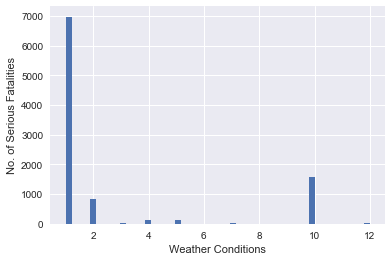

1     6974
10    1573
2      827
4      138
5      130
3       41
12      24
7       14
11       9
6        3
Name: WEATHER, dtype: int64
Legend: 

1 : Clear
10 : Cloudy
2 : Rain
4 : Snow
5 : Fog, Smog, Smoke
3 : Sleet, Hail
12 : Freezing Rain or Drizzle
7 : Blowing Sand, Soil, Dirt
11 : Blowing Snow
6 : Severe Crosswinds


Total Accidents where Adverse Weather Conditions Involved:  2759
Most common weather type in accidents with serious fatalities: 1 , Clear weather
Most common weather type in accidents involving adverse weather with serious fatalities: 10 , Cloudy
Proportion of Serious Fatalities Involving Adverse Weather Conditions: 28.13 %


In [10]:
#Histogram of weather conditions in accidents with serious fatalities
#Excludes unknown, undefined ("Other") and unreported instances

weather = traffic_clean.loc[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['WEATHER'] != 0) & (traffic_clean['WEATHER'] != 8) & (traffic_clean['WEATHER'] != 99) & (traffic_clean['WEATHER'] != 98), 'WEATHER']

fig, ax = plt.subplots()
ax.hist(weather, bins=50)
ax.set_xlabel("Weather Conditions")
ax.set_ylabel("No. of Serious Fatalities")
plt.show()

#Legend Dictionary
weather_dict = {1: "Clear", 
               10: "Cloudy", 
               2: "Rain", 
               4: "Snow", 
               5: "Fog, Smog, Smoke", 
               3: "Sleet, Hail", 
               12: "Freezing Rain or Drizzle", 
               7: "Blowing Sand, Soil, Dirt", 
               11: "Blowing Snow",  
               6: "Severe Crosswinds"}

#Get counts and proportions of serious fatalities involving adverse weather conditions

bad_weather = weather[weather != 1]
total_bad_weather = len(bad_weather)
print(weather.value_counts())
legend_print(weather_dict)
print("Total Accidents where Adverse Weather Conditions Involved: ", total_bad_weather)
print("Most common weather type in accidents with serious fatalities:", weather.value_counts().index[0], ", Clear weather")
print("Most common weather type in accidents involving adverse weather with serious fatalities:", bad_weather.value_counts().index[0], ", Cloudy")

print("Proportion of Serious Fatalities Involving Adverse Weather Conditions: {0:.2f}".format((total_bad_weather/total_serious) * 100),"%")


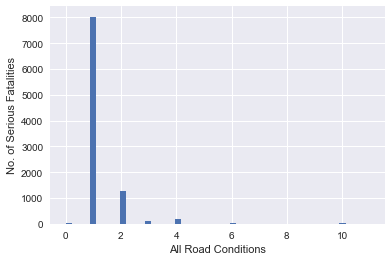

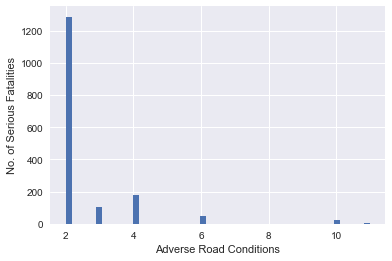

1     8027
2     1287
4      179
3      107
6       49
10      23
0       12
11       8
Name: VSURCOND, dtype: int64
Legend: 

1 : Dry
2 : Wet
4 : Ice/Frost
3 : Snow
6 : Water (Standing or Moving)
10 : Slush
0 : Non-Trafficway Area or Driveway Access
11 : Mud, Dirt, Gravel


Total Accidents where Adverse Road Conditions Involved:  1653
Most common road condition in accidents with serious fatalities: 1 , Dry
Most common road condition in accidents involving adverse road conditions with serious fatalities: 2 , Wet
Proportion of Serious Fatalities Involving Adverse Road Conditions: 16.85 %


In [11]:
#Histogram of road conditions in accidents with serious fatalities
#Excludes unknown, undefined ("Other") and unreported instances

roads = traffic_clean.loc[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['VSURCOND'] != 99) & (traffic_clean['VSURCOND'] != 8) &(traffic_clean['VSURCOND'] != 98), 'VSURCOND']
bad_roads = roads[(roads != 1) & (roads != 0)]

fig, ax = plt.subplots()
#plt.subplots_adjust(wspace=.5)
ax.hist(roads, bins=50)
ax.set_xlabel("All Road Conditions")
ax.set_ylabel("No. of Serious Fatalities")
plt.show()

fig2, ax2 = plt.subplots()
ax2.hist(bad_roads, bins=50)
ax2.set_xlabel("Adverse Road Conditions")
ax2.set_ylabel("No. of Serious Fatalities")

plt.show()

#Legend Dictionary
roads_dict = {1: "Dry", 
             2: "Wet", 
             4: "Ice/Frost", 
             3: "Snow", 
             6: "Water (Standing or Moving)", 
             10: "Slush", 
             0: "Non-Trafficway Area or Driveway Access", 
             11: "Mud, Dirt, Gravel"}

#Get counts and proportions of serious fatalities involving adverse road conditions


total_bad_roads = len(bad_roads)
print(roads.value_counts())
legend_print(roads_dict)
print("Total Accidents where Adverse Road Conditions Involved: ", total_bad_roads)
print("Most common road condition in accidents with serious fatalities:", roads.value_counts().index[0], ", Dry")
print("Most common road condition in accidents involving adverse road conditions with serious fatalities:", bad_roads.value_counts().index[0], ", Wet")

print("Proportion of Serious Fatalities Involving Adverse Road Conditions: {0:.2f}".format((total_bad_roads/total_serious) * 100),"%")



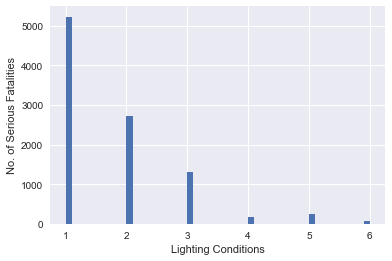

1    5234
2    2730
3    1317
5     253
4     182
6      70
Name: LGT_COND, dtype: int64
Legend: 

1 : Daylight
2 : Dark – Not Lighted
3 : Dark – Lighted
5 : Dusk
4 : Dawn
6 : Dark – Unknown Lighting


Total Accidents where Adverse Lighting Conditions Involved:  3235
Most common lighting condition in accidents with serious fatalities: 1 , Daylight
Most common adverse lighting condition in accidents with serious fatalities: 2 , Dark with no lighting
Proportion of Serious Fatalities Involving Adverse Lighting Conditions: 32.98 %


In [12]:
#Histogram of lighting conditions in accidents with serious fatalities

lighting = traffic_clean.loc[(traffic_clean['SERIOUS_FATALS'] > 0) & (traffic_clean['LGT_COND'] != 7) & (traffic_clean['LGT_COND'] != 8) & (traffic_clean['LGT_COND'] != 9), 'LGT_COND']

fig, ax = plt.subplots()
ax.hist(lighting, bins=50)
ax.set_xlabel("Lighting Conditions")
ax.set_ylabel("No. of Serious Fatalities")
plt.show()

#Legend Dictionary
light_dict = {1: "Daylight", 
             2: "Dark – Not Lighted", 
             3: "Dark – Lighted", 
             5: "Dusk", 
             4: "Dawn", 
             6: "Dark – Unknown Lighting"}


#Get counts and proportions of serious fatalities involving adverse lighting conditions

bad_lighting = lighting[(lighting != 1) & (lighting != 3)]
total_bad_lighting = len(bad_lighting)
print(lighting.value_counts())
legend_print(light_dict)
print("Total Accidents where Adverse Lighting Conditions Involved: ", total_bad_lighting)
print("Most common lighting condition in accidents with serious fatalities:", lighting.value_counts().index[0], ", Daylight")
print("Most common adverse lighting condition in accidents with serious fatalities:", bad_lighting.value_counts().index[0], ", Dark with no lighting")

print("Proportion of Serious Fatalities Involving Adverse Lighting Conditions: {0:.2f}".format((total_bad_lighting/total_serious) * 100),"%")



In [13]:
#Get overall percentage of human and enironment-caused factors

human_not_env = traffic_clean.loc[(traffic_clean['SERIOUS_FATALS'] > 0) & 
                  ((traffic_clean['DRUNK_DR'] >0) | (traffic_clean['TRAV_SP'] > traffic_clean['VSPD_LIM']) |
                   (traffic_clean['REST_USE'] == 7) | (traffic_clean['REST_MIS'] == 1) | 
                   (traffic_clean['DRUGS'] == 1) | ((traffic_clean['MDRDSTRD'] != 0) & (traffic_clean['MDRDSTRD'] != 99) & (traffic_clean['MDRDSTRD'] != 96)) | 
                  (traffic_clean['MDRMANAV'] < 95) | ((traffic_clean['MVIOLATN'] > 0) & (traffic_clean['MVIOLATN'] < 71))
                  ) & ((traffic_clean['WEATHER'] <= 1) & (traffic_clean['VSURCOND'] == 1) & 
                      ((traffic_clean['LGT_COND'] == 1) | (traffic_clean['LGT_COND'] == 3)) & 
                      (traffic_clean['WRK_ZONE'] == 0) & (traffic_clean['HAZ_INV'] == 1))]['SERIOUS_FATALS'].count()

mixed_causes = traffic_clean.loc[(traffic_clean['SERIOUS_FATALS'] > 0) & 
                  ((traffic_clean['DRUNK_DR'] >0) | (traffic_clean['TRAV_SP'] > traffic_clean['VSPD_LIM']) |
                   (traffic_clean['REST_USE'] == 7) | (traffic_clean['REST_MIS'] == 1) | 
                   (traffic_clean['DRUGS'] == 1) | ((traffic_clean['MDRDSTRD'] != 0) & (traffic_clean['MDRDSTRD'] != 99) & (traffic_clean['MDRDSTRD'] != 96)) | 
                  (traffic_clean['MDRMANAV'] < 95) | ((traffic_clean['MVIOLATN'] > 0) & (traffic_clean['MVIOLATN'] < 71))
                  )]['SERIOUS_FATALS'].count()

print("Proportion of Solely Human-Caused Serious Fatalities: {0:.2f}".format((human_not_env/total_serious) * 100),"%")
print("Proportion of Solely Environment-Related Serious Fatalities: {0:.2f}".format(((total_serious - mixed_causes)/total_serious) * 100),"%")
print("Proportion of Combined Human and Environment-Caused Serious Fatalities: {0:.2f}".format(((mixed_causes - human_not_env)/total_serious) * 100),"%")


Proportion of Solely Human-Caused Serious Fatalities: 35.59 %
Proportion of Solely Environment-Related Serious Fatalities: 20.58 %
Proportion of Combined Human and Environment-Caused Serious Fatalities: 43.83 %
